In [1]:
# Helpful Python packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./HAR-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./HAR-data/.DS_Store
./HAR-data/reference/.DS_Store
./HAR-data/reference/BRJ-2022-12-1908.05.06-upstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.09.53-walking-standing-walking-onTable.csv
./HAR-data/reference/BRJ-2022-12-1908.02.39-standing.csv
./HAR-data/reference/BRJ-2022-12-1908.03.34-walking.csv
./HAR-data/reference/BRJ-2022-12-1908.04.30-downstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.05.35-walkingWithCurves.csv


In [2]:
# Select a file for the case you want to analyze
dataset = pd.read_csv("HAR-data/reference//BRJ-2022-12-1908.05.06-upstairs.csv", delimiter=";", decimal=",")
dataset.describe()

,time,gFx,gFy,gFz,TgF
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,6.956099,0.228084,0.615865,0.757257,1.027333
std,4.021624,0.123764,0.142173,0.223354,0.186396
min,0.002954,-0.163000,0.295400,0.182000,0.486000
25%,3.478291,0.136950,0.522200,0.603700,0.914000
50%,6.960501,0.216500,0.632500,0.753200,1.017000
75%,10.435648,0.306600,0.705450,0.914800,1.128000
max,13.918067,0.685300,0.999700,1.586800,1.894000


In [3]:
# Duration of acceleration record
duration = dataset['time'][dataset.index[-1]]
# Acquisition frequency
fs = dataset[ (dataset['time']>0) & (dataset['time']<1) ]['TgF'].count()
# Interval between consecutive points (milliseconds)
interval = (1/fs) * 1000
print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval) )

13.9 seconds serie, interval between consecutive points = 5.0 milliseconds


In [4]:
# Set index of dataframe to be 'time' column
dataset.set_index('time', inplace = True)
dataset.head()

,gFx,gFy,gFz,TgF
time,,,,
0.002954,0.1979,0.4009,0.7740,0.894
0.003368,0.2165,0.4222,0.7388,0.878
0.003571,0.2079,0.4187,0.7476,0.882
0.007916,0.1793,0.4068,0.7652,0.885
0.013057,0.1241,0.3897,0.7745,0.876


# Exploratory Data Analysis
## Time series of vibration data
Let's follow the tutorial https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [5]:
# Select a subset of the vibration records
time_serie = dataset #['TgF']

## Graphics of temporal evolution: all in one graph
The next plots show the time series of the 4 accelerometers placed in the gearbox

In [6]:
# Import Python libraries for graphical representations
import matplotlib.pyplot as plt
from pylab import rcParams

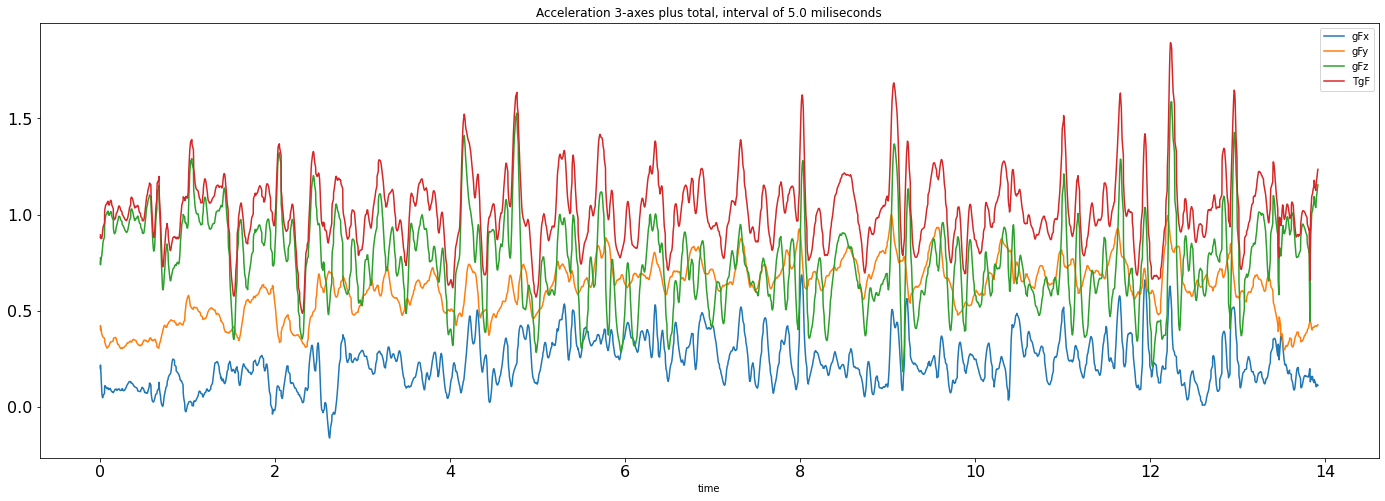

In [7]:
rcParams['figure.figsize'] = 24, 8
time_serie.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" %interval, fontsize=16)
plt.show()

## Histogram of the four vibration signals
Each plot shows the histogram for each of the 4 accelerations a1, a2, a3, a4

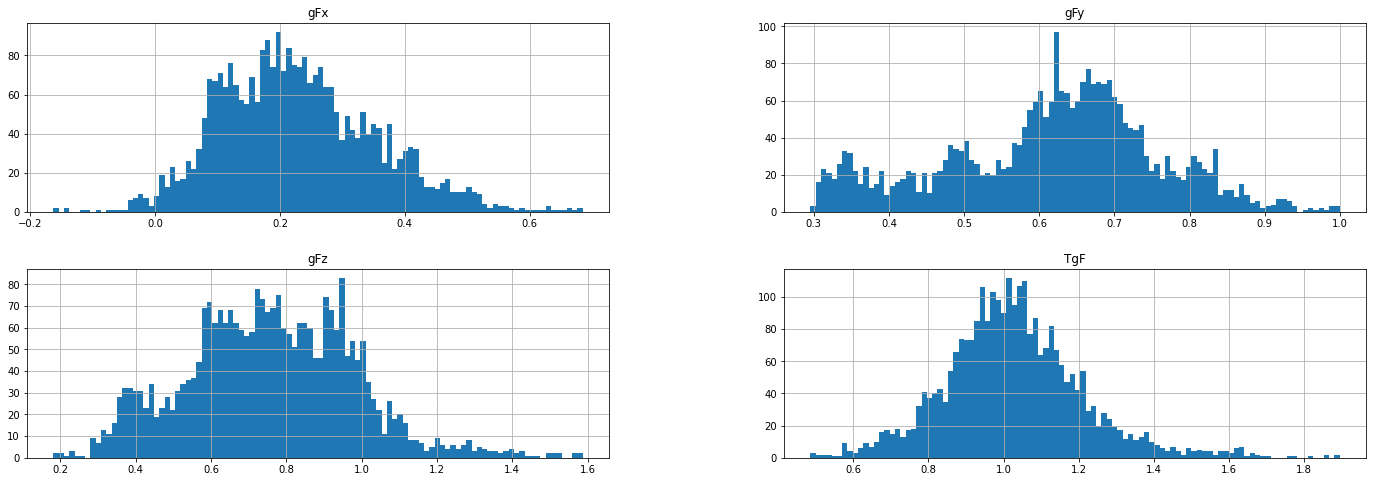

In [8]:
time_serie.hist(bins=100)
plt.show()

## Plots of probability density functions of vibration signals
KDE Plot described as *Kernel Density Estimate* is used for visualizing the Probability Density of a continuous variable

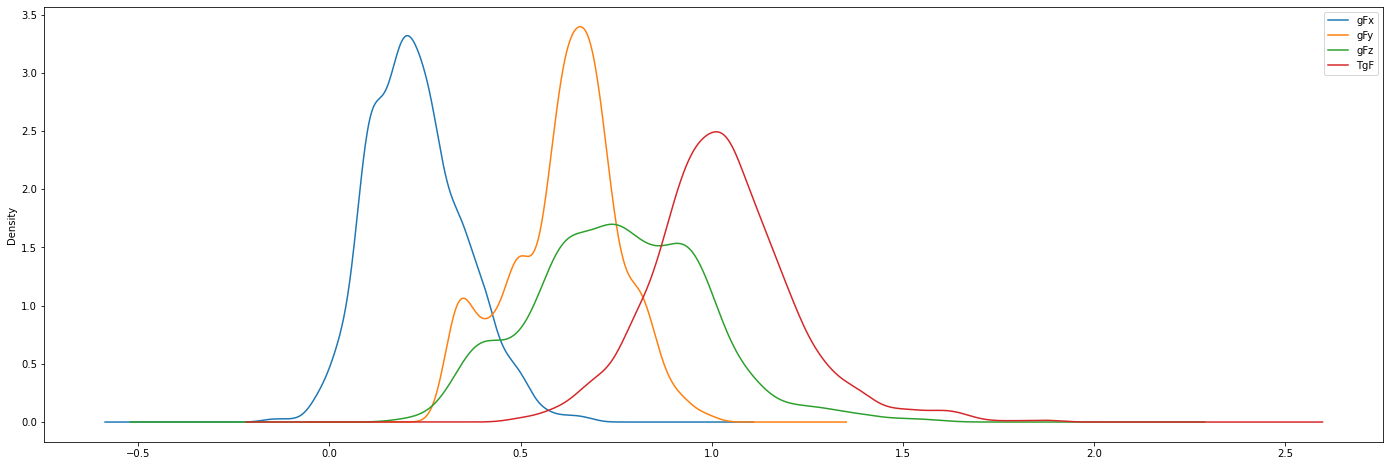

In [9]:
time_serie.plot(kind='kde')
#plt.xlim(-3, 3)
plt.show()

## Autocorrelation for a1 vibration signal
y(t+1) vs. y(t) values

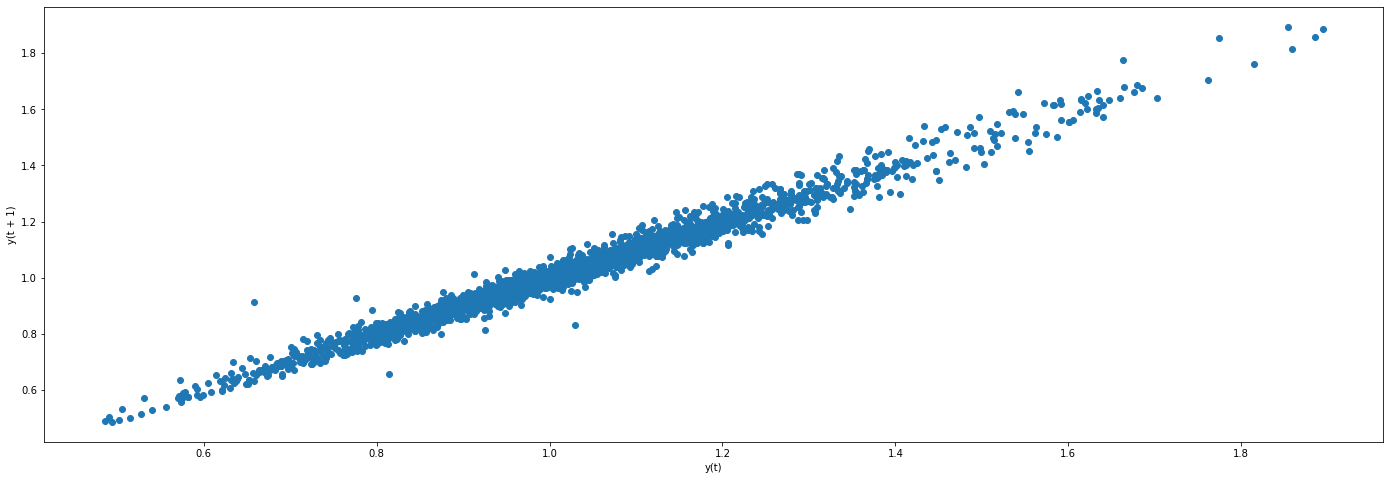

In [10]:
from pandas.plotting import lag_plot

lag_plot(time_serie['TgF'])
plt.show()

And as a function of the lag value: y(t+lag) vs. y(t) values

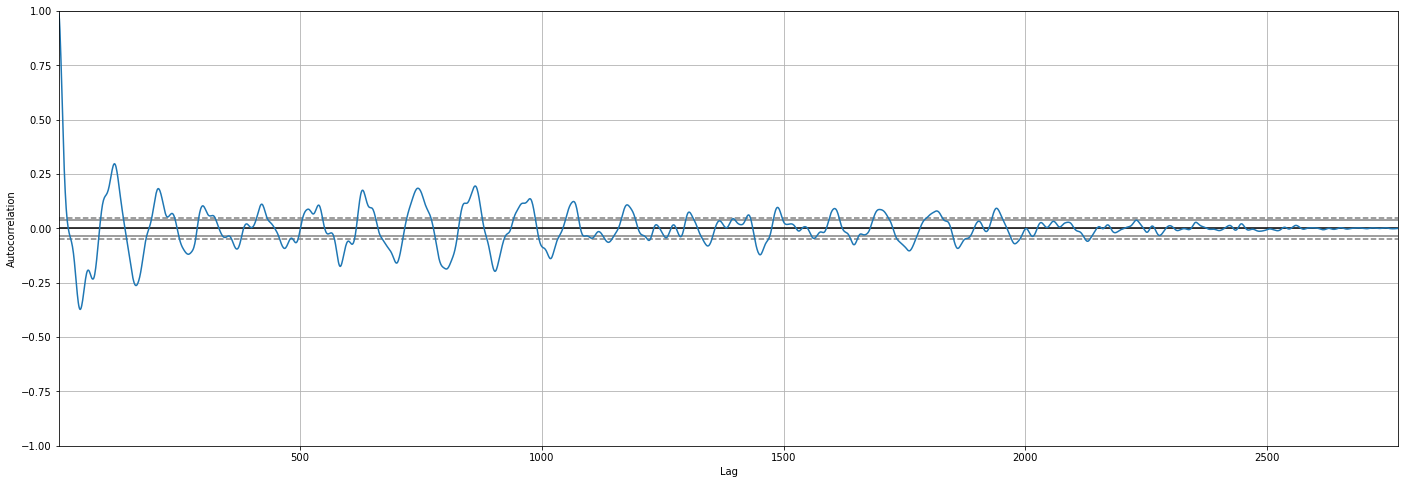

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(time_serie['TgF'])
plt.show()